In [18]:
from sklearn.datasets import make_classification

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

!pip install imblearn

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler

from collections import Counter


In [19]:
dataset= pd.read_csv('C:\\Users\\hvikram\\Downloads\\heart_2020_cleaned.csv')
dataset.head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [20]:
norm_data = dataset.copy()
  
# apply normalization techniques on Column 1
column = 'PhysicalHealth'
column2='BMI'
column3 = 'MentalHealth'
column4='SleepTime'
dataset[column] = (norm_data[column]-norm_data[column].min()) /(norm_data[column].max()-norm_data[column].min())
dataset[column2] = (norm_data[column2]-norm_data[column].min()) /(norm_data[column2].max()-norm_data[column2].min())
dataset[column3] = (norm_data[column3]-norm_data[column].min()) /(norm_data[column3].max()-norm_data[column3].min())
dataset[column4] = (norm_data[column4]-norm_data[column4].min()) /(norm_data[column4].max()-norm_data[column4].min())
  
# view normalized data
display(dataset)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.200410,Yes,No,No,0.100000,1.0,No,Female,55-59,White,Yes,Yes,Very good,0.173913,Yes,No,Yes
1,No,0.245563,No,No,Yes,0.000000,0.0,No,Female,80 or older,White,No,Yes,Very good,0.260870,No,No,No
2,No,0.320898,Yes,No,No,0.666667,1.0,No,Male,65-69,White,Yes,Yes,Fair,0.304348,Yes,No,No
3,No,0.292285,No,No,No,0.000000,0.0,No,Female,75-79,White,No,No,Good,0.217391,No,No,Yes
4,No,0.286249,No,No,No,0.933333,0.0,Yes,Female,40-44,White,No,Yes,Very good,0.304348,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,0.330919,Yes,No,No,0.233333,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,0.217391,Yes,No,No
319791,No,0.360256,Yes,No,No,0.000000,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,0.173913,Yes,No,No
319792,No,0.292648,No,No,No,0.000000,0.0,No,Female,45-49,Hispanic,No,Yes,Good,0.217391,No,No,No
319793,No,0.396113,No,No,No,0.000000,0.0,No,Female,25-29,Hispanic,No,No,Good,0.478261,No,No,No


In [21]:
Bin_variables = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke","DiffWalking", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

dataset[Bin_variables] = dataset[Bin_variables].apply(lambda x: x.str.upper())

In [22]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,NO,0.200410,YES,NO,NO,0.100000,1.0,NO,Female,55-59,White,Yes,YES,Very good,0.173913,YES,NO,YES
1,NO,0.245563,NO,NO,YES,0.000000,0.0,NO,Female,80 or older,White,No,YES,Very good,0.260870,NO,NO,NO
2,NO,0.320898,YES,NO,NO,0.666667,1.0,NO,Male,65-69,White,Yes,YES,Fair,0.304348,YES,NO,NO
3,NO,0.292285,NO,NO,NO,0.000000,0.0,NO,Female,75-79,White,No,NO,Good,0.217391,NO,NO,YES
4,NO,0.286249,NO,NO,NO,0.933333,0.0,YES,Female,40-44,White,No,YES,Very good,0.304348,NO,NO,NO


In [23]:
dataset[Bin_variables] = dataset[Bin_variables].apply(lambda x: x.map({'YES':1,'NO':0}))


In [24]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,Female,55-59,White,Yes,1,Very good,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,Female,80 or older,White,No,1,Very good,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,Male,65-69,White,Yes,1,Fair,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,Female,75-79,White,No,0,Good,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,Female,40-44,White,No,1,Very good,0.304348,0,0,0


In [25]:
dataset.replace(('Male','Female'),(1,0),inplace=True)
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,0,55-59,White,Yes,1,Very good,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,0,80 or older,White,No,1,Very good,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,1,65-69,White,Yes,1,Fair,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,0,75-79,White,No,0,Good,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,0,40-44,White,No,1,Very good,0.304348,0,0,0


In [26]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dataset['Diabetic']= label_encoder.fit_transform(dataset['Diabetic'])
dataset['AgeCategory']= label_encoder.fit_transform(dataset['AgeCategory'])
dataset['Race']= label_encoder.fit_transform(dataset['Race'])
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,0,7,5,2,1,Very good,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,0,12,5,0,1,Very good,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,1,9,5,2,1,Fair,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,0,11,5,0,0,Good,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,0,4,5,0,1,Very good,0.304348,0,0,0


In [27]:
d1=['GenHealth']
dataset[d1] = dataset[d1].apply(lambda x: x.map({'Very good':3,'Good':2,'Excellent':4,'Fair':1,'Poor':0}))
dataset.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.200410,1,0,0,0.100000,1.0,0,0,7,5,2,1,3,0.173913,1,0,1
1,0,0.245563,0,0,1,0.000000,0.0,0,0,12,5,0,1,3,0.260870,0,0,0
2,0,0.320898,1,0,0,0.666667,1.0,0,1,9,5,2,1,1,0.304348,1,0,0
3,0,0.292285,0,0,0,0.000000,0.0,0,0,11,5,0,0,2,0.217391,0,0,1
4,0,0.286249,0,0,0,0.933333,0.0,1,0,4,5,0,1,3,0.304348,0,0,0


In [28]:
X=dataset.copy()
Y=dataset['HeartDisease']
X.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [29]:
X.drop('HeartDisease',axis=1,inplace=True)

In [30]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, Y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[(0, 292422), (1, 292422)] (584844,)


In [31]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2)
x_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
287844,0.365689,1,0,0,0.000000,0.1,0,0,2,5,0,1,4,0.173913,0,0,0
383595,0.363757,0,0,0,0.066667,0.0,0,1,9,3,0,1,1,0.173913,1,0,0
569786,0.320415,1,0,0,0.000000,0.0,0,1,12,5,0,0,2,0.260870,0,0,0
269187,0.330919,0,0,0,0.000000,0.0,0,1,9,2,2,1,3,0.260870,1,0,0
459328,0.285766,1,0,0,1.000000,0.2,1,1,7,4,2,1,0,0.260870,1,0,0


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics 

naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)

y_predN = naiveBayes.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predN))

Accuracy: 0.710333507168566


C:\Users\hvikram\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


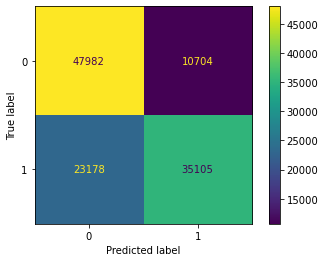

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(naiveBayes, x_test, y_test)  
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predN))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74     58686
           1       0.77      0.60      0.67     58283

    accuracy                           0.71    116969
   macro avg       0.72      0.71      0.71    116969
weighted avg       0.72      0.71      0.71    116969



              precision    recall  f1-score   support

           0       0.95      0.88      0.91     87649
           1       0.26      0.47      0.34      8290

    accuracy                           0.84     95939
   macro avg       0.61      0.67      0.62     95939
weighted avg       0.89      0.84      0.86     95939



In [37]:
    from sklearn.ensemble import BaggingClassifier
    from sklearn.datasets import make_classification


    bg  = BaggingClassifier(GaussianNB(),n_estimators = 10,random_state = 0)
    bg.fit(x_train,y_train)
    bg.score(x_test,y_test)

0.7102907607998701